<a href="https://colab.research.google.com/github/sauradip007/RNN_Google-Price/blob/main/rnn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN on Google's stock price predictions


In [ ]:
# Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
df_train.shape

(1258, 6)

In [ ]:
df_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [ ]:
df_train['Date']

0         1/3/2012
1         1/4/2012
2         1/5/2012
3         1/6/2012
4         1/9/2012
           ...    
1253    12/23/2016
1254    12/27/2016
1255    12/28/2016
1256    12/29/2016
1257    12/30/2016
Name: Date, Length: 1258, dtype: object

In [ ]:
training_set = df_train.iloc[:,1:2].values
# all rows of the first col only
training_set.shape 
# We are only interested in the open price column for the training set

(1258, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
trainingset_scaled = sc.fit_transform(training_set)
trainingset_scaled.shape

(1258, 1)

In [ ]:
trainingset_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
y_train =[]
for i in range (60,1258):
  X_train.append(trainingset_scaled[i-60:i,0])
  y_train.append(trainingset_scaled[i,0])
# Converting the obtained lists to numpy arrays as they are to be accepted by the rnn
X_train,y_train = np.array(X_train),np.array(y_train)


In [ ]:
X_train.shape

(1198, 60)

In [ ]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [ ]:
# reshaping according to keras docs
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# Dropout regularisation added to prevent overfitting
regressor = Sequential() #Initialising the RNN

In [ ]:
# Adding the first LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 50 units added as a lower no of neurons won't be able to capture the upward and downward trends
regressor.add(Dropout(0.2)) #Adding a dropout rate of 20% which means the 50 neurons

In [ ]:
# Adding a second LSTM layer
# No need to add input shape here as it is automatically identified by the rnn
regressor.add(LSTM(units = 50, return_sequences = True))
# 50 units added as a lower no of neurons won't be able to capture the upward and downward trends
regressor.add(Dropout(0.2)) #Adding a dropout rate of 20% which means out of the 50 neurons, 10 neurons will be igored in forward and back propagation


In [ ]:
# Adding the third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
# 50 units added as a lower no of neurons won't be able to capture the upward and downward trends
regressor.add(Dropout(0.2)) #Adding a dropout rate of 20% which means out of the 50 neurons, 10 neurons will be igored in forward and back propagation




In [ ]:
# Adding fourth LSTM layer
regressor.add(LSTM(units = 50, return_sequences = False)) #Since no more LSTM layers will be added we are making return sequences as false
# 50 units added as a lower no of neurons won't be able to capture the upward and downward trends
regressor.add(Dropout(0.2)) #Adding a dropout rate of 20% which means out of the 50 neurons, 10 neurons will be igored in forward and back propagation


In [ ]:
# Adding the output
regressor.add(Dense(units=1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

Fiting the RNN

In [ ]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 15s 154ms/step - loss: 0.0345
Epoch 2/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0039
Epoch 13/100

In [ ]:
# Getting the open column from the test dataset
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_stock_price = dataset_test.iloc[:,1:2].values
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
test_stock_price.shape

(20, 1)

In [ ]:
# Visualising the results

In [ ]:
df_train.shape

(1258, 6)

In [ ]:
dataset_total = pd.concat((df_train['Open'],dataset_test['Open']),axis=0)
#contains entire dataset (training + test)

# at each time t we need stock prices of t-60

In [ ]:
len(dataset_total)

1278

In [ ]:
len(dataset_test)

20

In [ ]:
dataset_total[1258-60]

779.0

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) -  60:].values
# Since dataset total is taking vals from df_train we will need to scale these inputs using min max caler so that it can be fed into the rnn
# As previously we had scaled our inputs into the rnn

In [ ]:
inputs.shape

(80,)

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
#Now following the same steps as done before to create structures X and y

In [ ]:
X_test = []
# This contains the input values to be tested
# No need for y_train as we are making predictions
for i in range (60,80):
  X_test.append(inputs[i-60:i,0])
  
# Converting the obtained list to numpy arrays as they are to be accepted by the rnn
X_test = np.array(X_test)
# Converting our test dataset to a 3d np array to be fed into the rnn as done before
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[786.3618 ],
       [783.3898 ],
       [784.5431 ],
       [786.10223],
       [789.5916 ],
       [795.7466 ],
       [800.4113 ],
       [801.24805],
       [801.16364],
       [801.3175 ],
       [801.71893],
       [801.9358 ],
       [802.03973],
       [802.87   ],
       [803.8805 ],
       [809.48676],
       [816.7327 ],
       [823.68115],
       [826.1279 ],
       [819.4647 ]], dtype=float32)

In [ ]:
predicted_stock_price.shape

(20, 1)

In [ ]:
# Visualising the model created

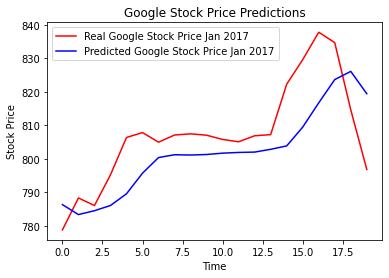

In [ ]:
plt.plot(test_stock_price,color='r',label='Real Google Stock Price Jan 2017') # Real values according to the test set
plt.plot(predicted_stock_price,color='b',label='Predicted Google Stock Price Jan 2017') # Predicted values by the RNN
plt.title('Google Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
